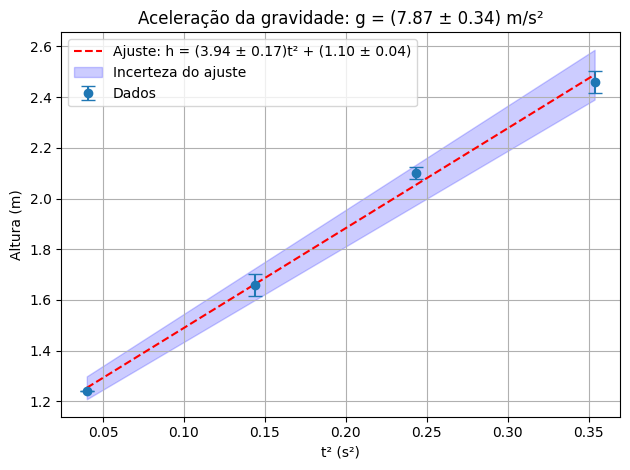

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados experimentais
alturas = np.array([1.24, 1.66, 2.10, 2.46])
tempos = np.array([
    [0.20, 0.20, 0.20],
    [0.30, 0.419, 0.42],
    [0.51, 0.51, 0.46],
    [0.544, 0.61, 0.63]
])

# Cálculo das médias e desvios padrão
tempos_medios = np.mean(tempos, axis=1)
tempos_std = np.std(tempos, axis=1)
tempos_medios2 = tempos_medios ** 2
tempos_std2 = 2 * tempos_medios * tempos_std

# Função de ajuste linear
def func(x, a, b):
    return a * x + b

# Ajuste dos dados
popt, pcov = curve_fit(func, tempos_medios2, alturas)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

# Cálculo da gravidade
g = 2 * a
g_err = 2 * a_err

# Gráfico
plt.errorbar(tempos_medios2, alturas, yerr=tempos_std2, fmt='o', label='Dados', capsize=5)
plt.plot(tempos_medios2, func(tempos_medios2, *popt), 'r--',
         label=f'Ajuste: h = ({a:.2f} ± {a_err:.2f})t² + ({b:.2f} ± {b_err:.2f})')
plt.fill_between(tempos_medios2,
                 func(tempos_medios2, a - a_err, b - b_err),
                 func(tempos_medios2, a + a_err, b + b_err),
                 color='blue', alpha=0.2, label='Incerteza do ajuste')

plt.xlabel('t² (s²)')
plt.ylabel('Altura (m)')
plt.title(f'Aceleração da gravidade: g = ({g:.2f} ± {g_err:.2f}) m/s²')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
